In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
from lightgbm import LGBMRegressor
import math
import cv2
import matplotlib.patches as mpatches
import colorsys

# Visualization - Bands and CSPM

In [3]:
data_path = '../data/generated_baseline_convolution/bands_cspm/'
charts_path = '../charts/error_visualization/baseline_convolution_bands_cspm/'

In [4]:
val_data = jb.load(f'{data_path}val_data_bands_cspm_baseline_convolution.pkl.z')
val_data

,b1,b2,b3,b4,b5,b6,b7,b8,cspmb7,z,x,y,rf_pred,lgbm_pred,rf_pred_smooth
0,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,23.382784,3.195862,233,1130,3.327069,3.263602,3.252858
3,0.1199,0.0882,0.0692,0.0452,0.0488,0.0324,0.0281,0.0232,23.158824,3.268182,233,1133,3.207836,2.887565,3.260071
5,0.1196,0.0866,0.0687,0.0451,0.0489,0.0323,0.0285,0.0229,23.607309,3.294375,233,1135,3.212436,3.188754,3.242697
6,0.1196,0.0868,0.0674,0.0451,0.0485,0.0317,0.0296,0.0232,24.852202,3.353030,233,1136,3.168455,3.116440,3.242697
8,0.1224,0.0917,0.0725,0.0509,0.0554,0.0345,0.0331,0.0264,28.922021,2.230000,234,1003,2.726091,3.291766,2.998549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19276,0.1256,0.1026,0.0803,0.0529,0.0436,0.0275,0.0256,0.0217,20.408150,3.026562,2290,83,3.968316,3.429625,3.968316
19277,0.1277,0.1031,0.0824,0.0541,0.0464,0.0281,0.0267,0.0219,21.607165,2.920000,2290,84,5.098087,3.070840,5.098087
19278,0.1277,0.1018,0.0811,0.0550,0.0464,0.0281,0.0267,0.0222,21.607165,2.820312,2291,84,4.842504,6.546937,4.842504
19280,0.1267,0.1026,0.0805,0.0558,0.0473,0.0290,0.0263,0.0239,21.169079,2.594444,2292,85,4.370553,7.049632,4.370553


In [5]:
val_data['z_pred'] = val_data['rf_pred_smooth']
val_data.drop(['rf_pred','rf_pred_smooth', 'lgbm_pred'], axis=1, inplace=True)
val_data.head()

,b1,b2,b3,b4,b5,b6,b7,b8,cspmb7,z,x,y,z_pred
0,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,23.382784,3.195862,233,1130,3.252858
3,0.1199,0.0882,0.0692,0.0452,0.0488,0.0324,0.0281,0.0232,23.158824,3.268182,233,1133,3.260071
5,0.1196,0.0866,0.0687,0.0451,0.0489,0.0323,0.0285,0.0229,23.607309,3.294375,233,1135,3.242697
6,0.1196,0.0868,0.0674,0.0451,0.0485,0.0317,0.0296,0.0232,24.852202,3.353030,233,1136,3.242697
8,0.1224,0.0917,0.0725,0.0509,0.0554,0.0345,0.0331,0.0264,28.922021,2.230000,234,1003,2.998549


In [8]:
df_data = val_data
df_data['error'] = df_data['z_pred'] - df_data['z']
df_data['abs_error'] = abs(df_data['error'])

In [9]:
df_data

,b1,b2,b3,b4,b5,b6,b7,b8,cspmb7,z,x,y,z_pred,error,abs_error
0,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,23.382784,3.195862,233,1130,3.252858,0.056996,0.056996
3,0.1199,0.0882,0.0692,0.0452,0.0488,0.0324,0.0281,0.0232,23.158824,3.268182,233,1133,3.260071,-0.008111,0.008111
5,0.1196,0.0866,0.0687,0.0451,0.0489,0.0323,0.0285,0.0229,23.607309,3.294375,233,1135,3.242697,-0.051678,0.051678
6,0.1196,0.0868,0.0674,0.0451,0.0485,0.0317,0.0296,0.0232,24.852202,3.353030,233,1136,3.242697,-0.110333,0.110333
8,0.1224,0.0917,0.0725,0.0509,0.0554,0.0345,0.0331,0.0264,28.922021,2.230000,234,1003,2.998549,0.768549,0.768549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19276,0.1256,0.1026,0.0803,0.0529,0.0436,0.0275,0.0256,0.0217,20.408150,3.026562,2290,83,3.968316,0.941754,0.941754
19277,0.1277,0.1031,0.0824,0.0541,0.0464,0.0281,0.0267,0.0219,21.607165,2.920000,2290,84,5.098087,2.178087,2.178087
19278,0.1277,0.1018,0.0811,0.0550,0.0464,0.0281,0.0267,0.0222,21.607165,2.820312,2291,84,4.842504,2.022192,2.022192
19280,0.1267,0.1026,0.0805,0.0558,0.0473,0.0290,0.0263,0.0239,21.169079,2.594444,2292,85,4.370553,1.776108,1.776108


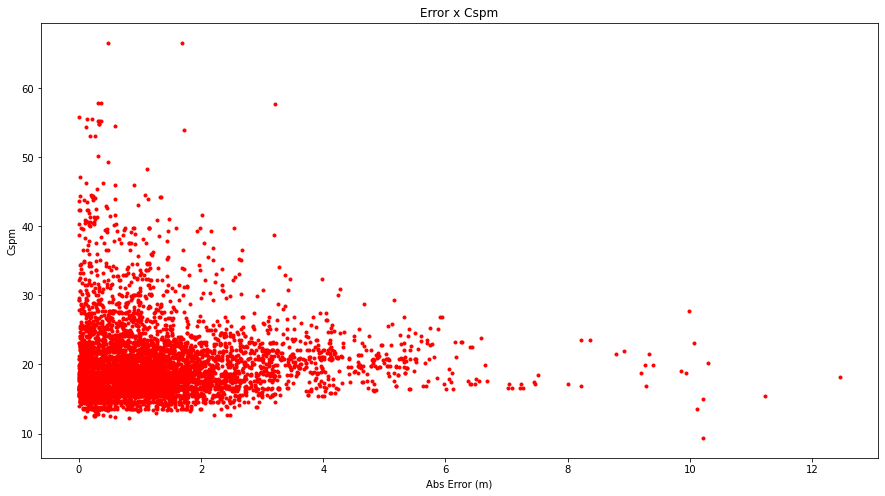

In [10]:
plt.figure(figsize=(15,8))
plt.plot(df_data['abs_error'], df_data['cspmb7'], 'r.')
plt.xlabel("Abs Error (m)")
plt.ylabel("Cspm")
plt.title('Error x Cspm')
plt.savefig(f'{charts_path}chart_abs_error_x_cspm.jpg')
#plt.grid()
plt.show()

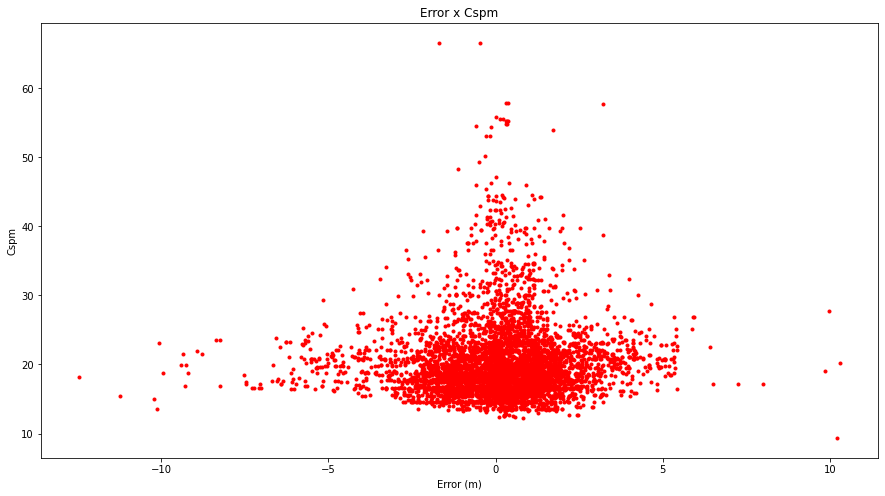

In [11]:
plt.figure(figsize=(15,8))
plt.plot(df_data['error'], df_data['cspmb7'], 'r.')
plt.xlabel("Error (m)")
plt.ylabel("Cspm")
plt.title('Error x Cspm')
plt.savefig(f'{charts_path}chart_error_x_cspm.jpg')
#plt.grid()
plt.show()

In [12]:
df_result = df_data.drop(['b1','b2','b3','b4','b5','b6','b7','b8'],axis=1)

In [13]:
df_result['z_mean_rd'] = df_result['z'].apply(np.floor)

In [14]:
df_depth = df_result.drop(['x','y','z_pred','z'],axis=1).groupby('z_mean_rd').mean().reset_index()
df_depth.columns = ['depth_round_down','cspm','mean_error','mean_abs_error']
df_depth

,depth_round_down,cspm,mean_error,mean_abs_error
0,1.0,20.538312,1.933400,1.933400
1,2.0,21.247336,1.336481,1.345067
2,3.0,21.708915,1.060045,1.112603
3,4.0,21.454342,0.717332,0.848660
4,5.0,20.174773,0.510714,0.861045
5,6.0,19.344602,0.153829,0.941924
6,7.0,19.391114,-0.049891,0.907398
7,8.0,18.749881,-0.190965,0.929025
8,9.0,18.786801,-0.542135,1.225353
9,10.0,18.888665,-0.879956,1.395222


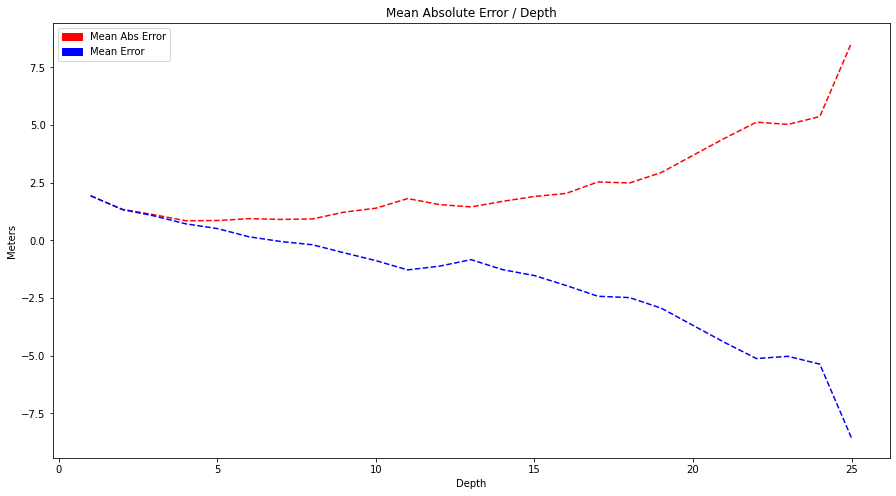

In [15]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['mean_abs_error'], 'r--', df_depth['depth_round_down'], df_depth['mean_error'], 'b--')
red = mpatches.Patch(color='red', label='Mean Abs Error')
blue = mpatches.Patch(color='blue', label='Mean Error')
plt.legend(handles=[red,blue])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig(f'{charts_path}chart_mean_error.jpg')
plt.title('Mean Absolute Error / Depth')
#plt.grid()
plt.show()

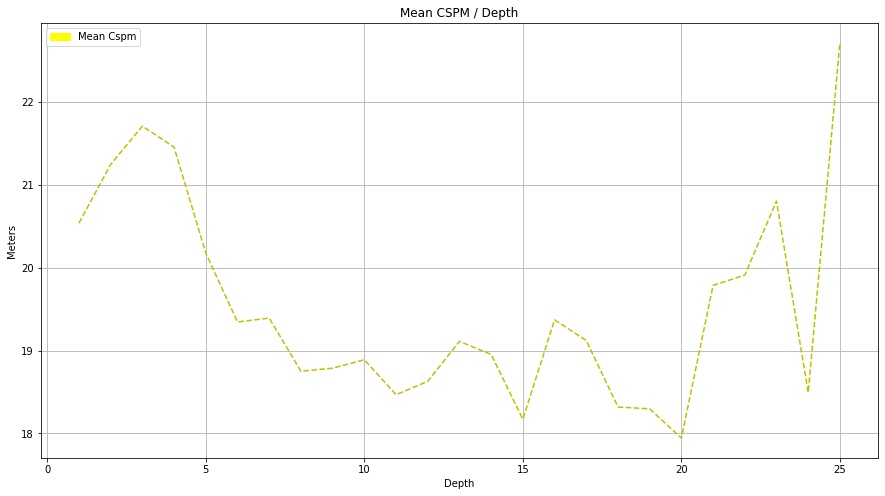

In [16]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['cspm'], 'y--')
yellow = mpatches.Patch(color='yellow', label='Mean Cspm')
plt.legend(handles=[yellow])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig(f'{charts_path}chart_mean_cspm.jpg')
plt.title('Mean CSPM / Depth')
plt.grid()
plt.show()

In [25]:
base_image = cv2.imread(f'{charts_path}rgb_image.jpg')

In [26]:
transects_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = row[-5]
    y = row[-4]
    transects_image[y][x] = [255,255,255]
cv2.imwrite(f'{charts_path}bat_transects.jpg',transects_image)

True

In [27]:
abs_error_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = int(row[-5])
    y = int(row[-4])
    abs_error = row[-1]
    abs_error_image[y][x] = [int(e*255) for e in (colorsys.hls_to_rgb(abs_error/(df_data['abs_error'].max()*1.2), 0.5, 1))]

cv2.imwrite(f'{charts_path}abs_error.jpg',cv2.cvtColor(abs_error_image, cv2.COLOR_BGR2RGB))

True

In [28]:
cspm_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = int(row[-5])
    y = int(row[-4])
    cspm = row[-7]
    cspm_image[y][x] = [int(e*255) for e in (colorsys.hls_to_rgb(cspm/(df_data['cspmb7'].max()*1.2), 0.5, 1))]

cv2.imwrite(f'{charts_path}cspm.jpg',cv2.cvtColor(cspm_image, cv2.COLOR_BGR2RGB))

True

In [29]:
def find_transect(x_s, y_s, x_e, y_e, df):
    transect = list()
    angle = math.atan2(y_s-y_e, x_s-x_e)
    low_x, high_x = (x_s, x_e) if x_s < x_e else (x_e, x_s)
    low_y, high_y = (y_s, y_e) if y_s < y_e else (y_e, y_s)
    df_t = df[(df['x'] >= low_x) & (df['x'] <= high_x)]
    df_t = df_t[(df_t['y'] >= low_y) & (df_t['y'] <= high_y)]
    for i, row in enumerate(df_t.itertuples()):
        #print(row)
        x = row[-5] # change this to dynamic 
        y = row[-4] # change this to dynamic 
        angle2 = math.atan2(y-y_e,x-x_e)
        if abs(angle2 - angle) < 0.05:
            transect.append(row)
    return transect
    

In [39]:
def generate_transect_charts(df_data, coords, path, image=None):
    transect = find_transect(coords[0],coords[1],coords[2],coords[3],df_data)
    
    if image is not None:
        transect_image = image.copy()
        for i, row in enumerate(transect):
            x = row[1] # Change this to dynamic
            y = row[2] # change this to dynamic
            transect_image[y][x] = [0,255,0]

        cv2.imwrite(f'{path}bat_single_transect_{coords[0]}_{coords[1]}.jpg',transect_image)

    df_transect = pd.DataFrame(transect)
    #print(df_transect.head())
    df_transect.drop(['Index'], axis=1, inplace=True)

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],-df_transect['z'], 'r-', df_transect['x'],-df_transect['z_pred'], 'b-')
    red = mpatches.Patch(color='red', label='Bathymetry')
    blue = mpatches.Patch(color='blue', label='Prediction')
    plt.legend(handles=[red,blue])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Depth(m)")
    plt.savefig(f'{path}chart_bat_pred_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['error'], 'g.')
    lbl = mpatches.Patch(color='green', label='Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.savefig(f'{path}chart_error_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['abs_error'], 'm.')
    lbl = mpatches.Patch(color='magenta', label='Abs Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.savefig(f'{path}chart_abs_error_{coords[0]}_{coords[1]}.jpg')
    
    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['cspmb7'], 'y.')
    lbl = mpatches.Patch(color='yellow', label='Cspm')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Cspm")
    plt.savefig(f'{path}cspm_{coords[0]}_{coords[1]}.jpg')


In [40]:
transect_coords = [[510,410,680,310],
                   [1604,142,1772,440],
                   [871,1123,1190,939],
                   [1020,705,1319,532]]

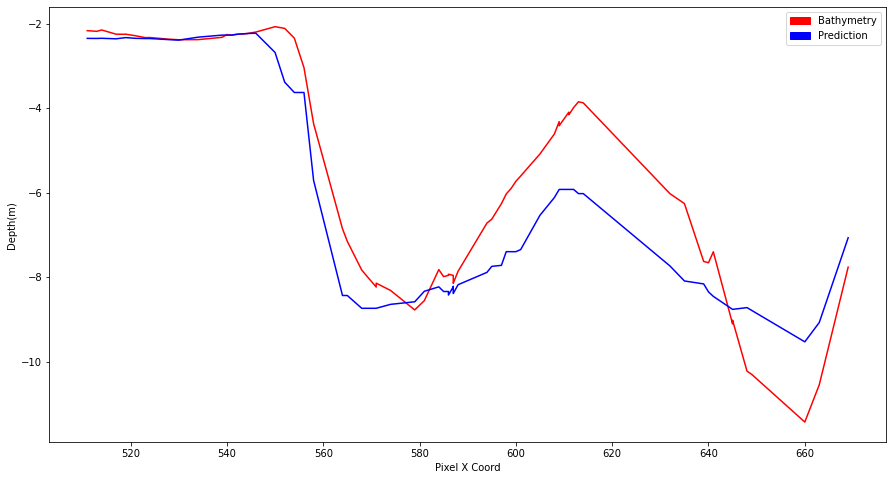

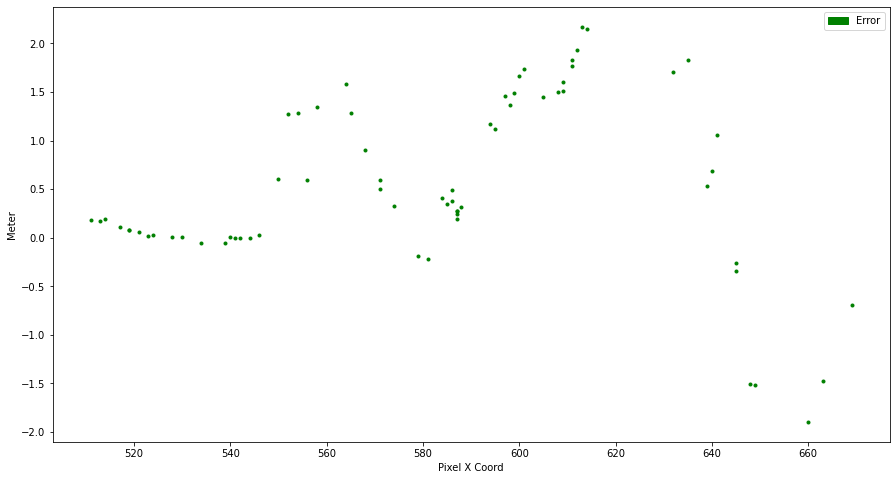

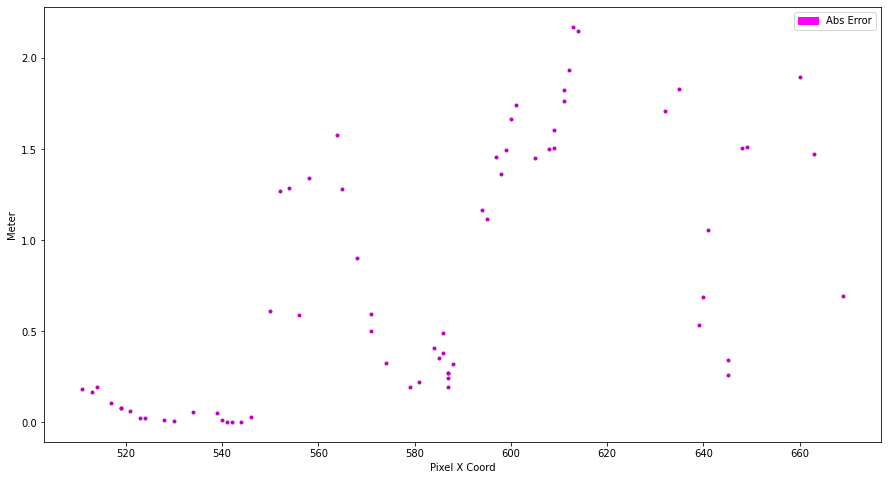

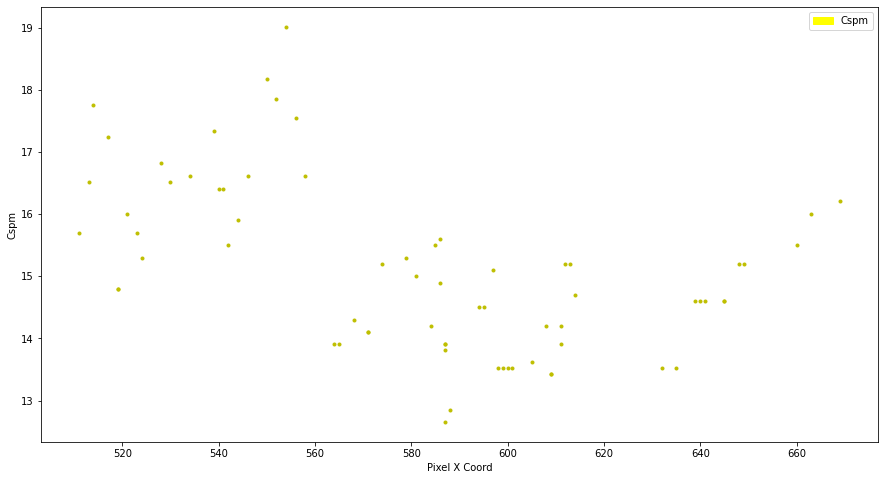

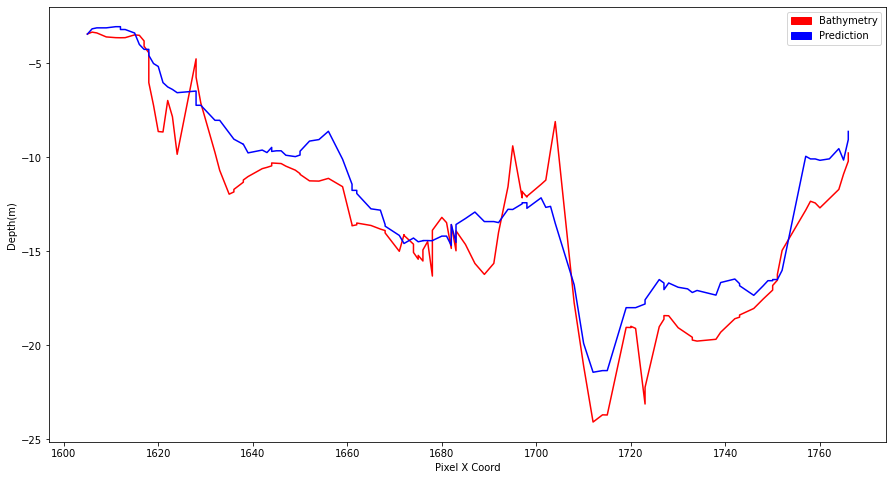

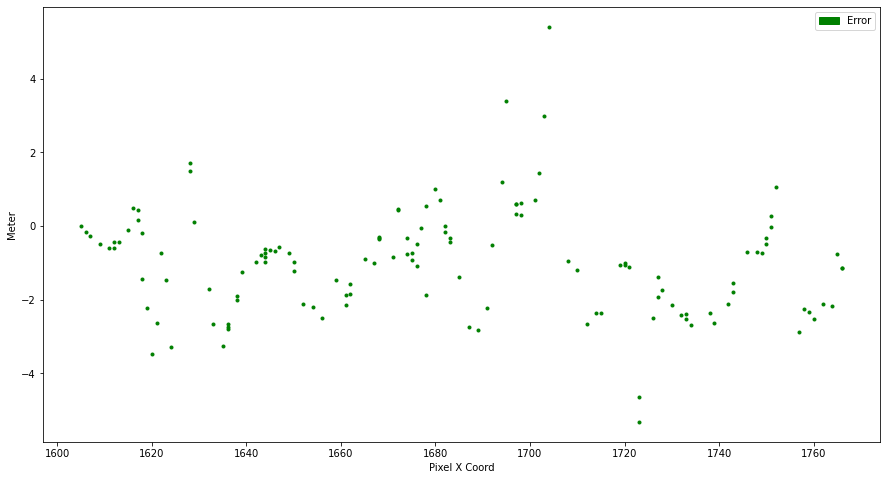

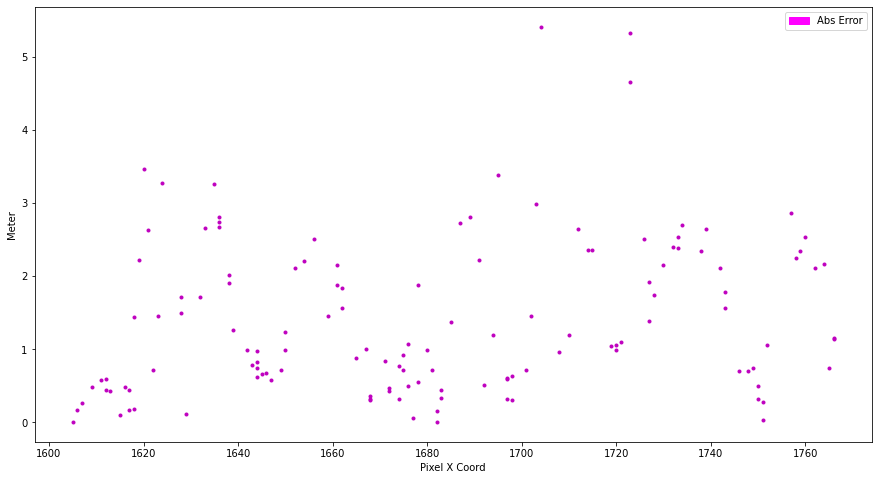

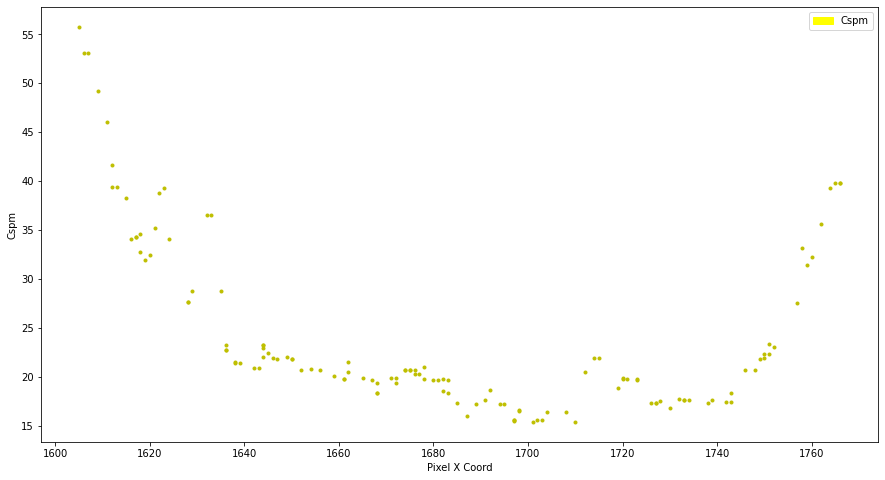

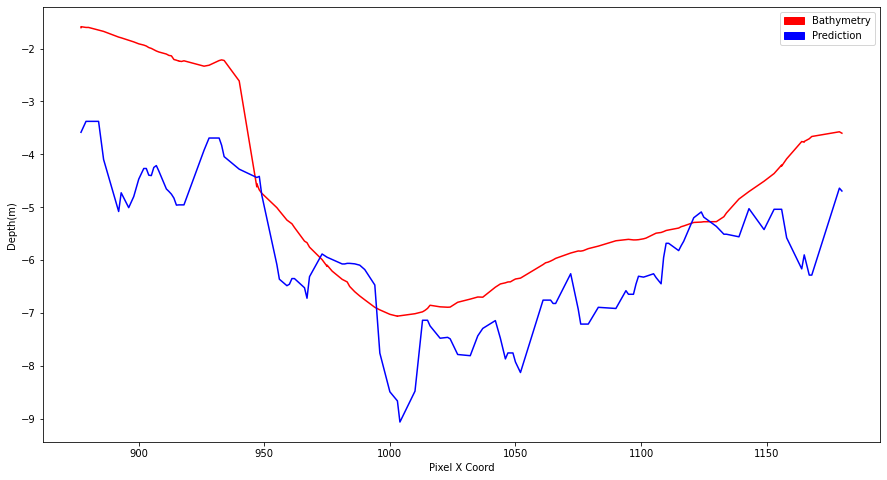

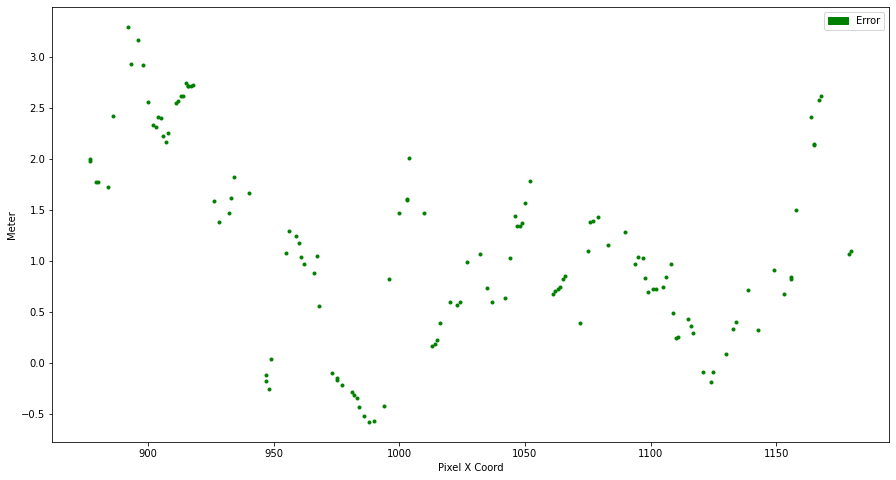

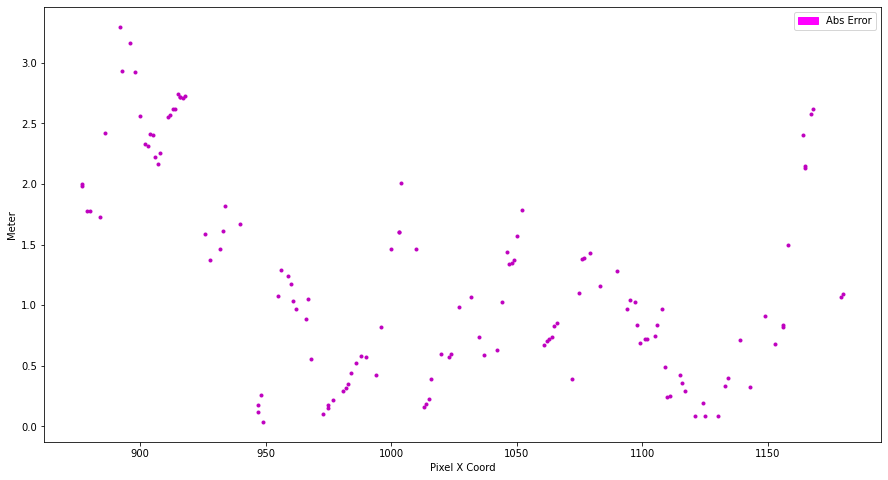

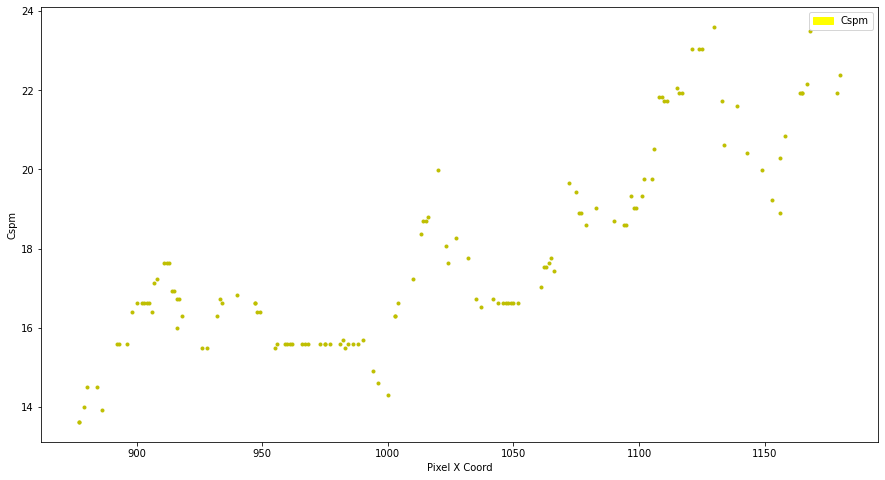

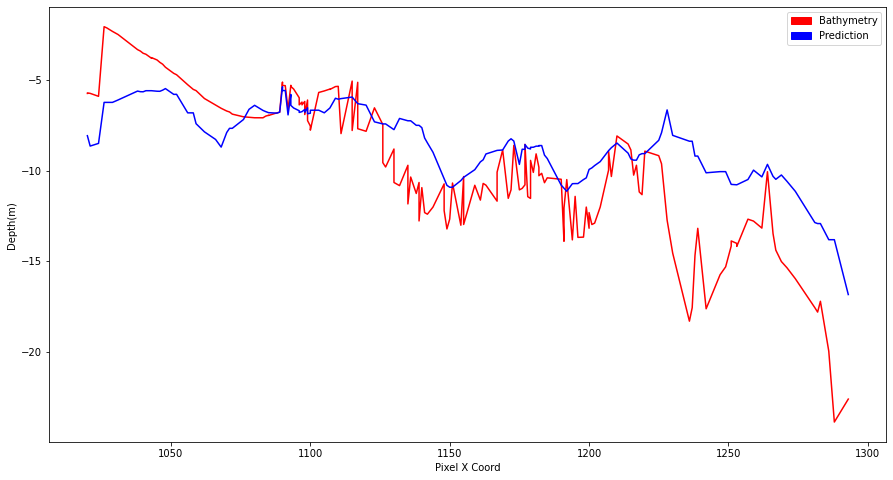

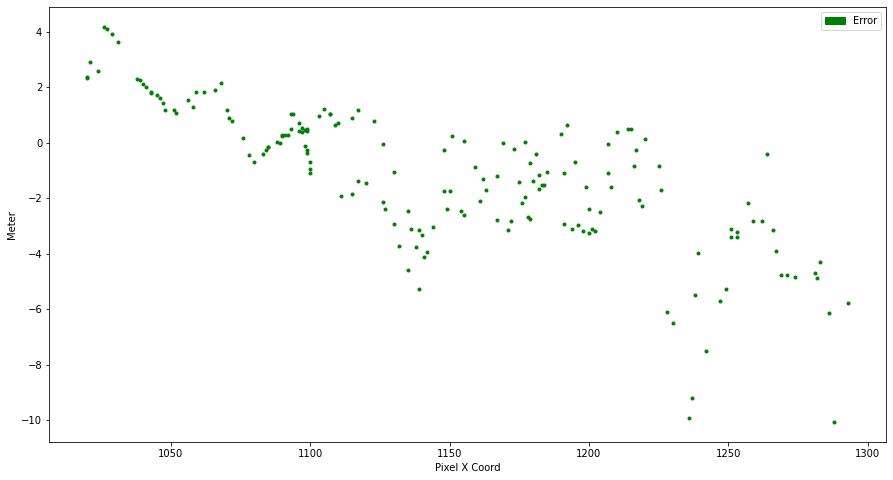

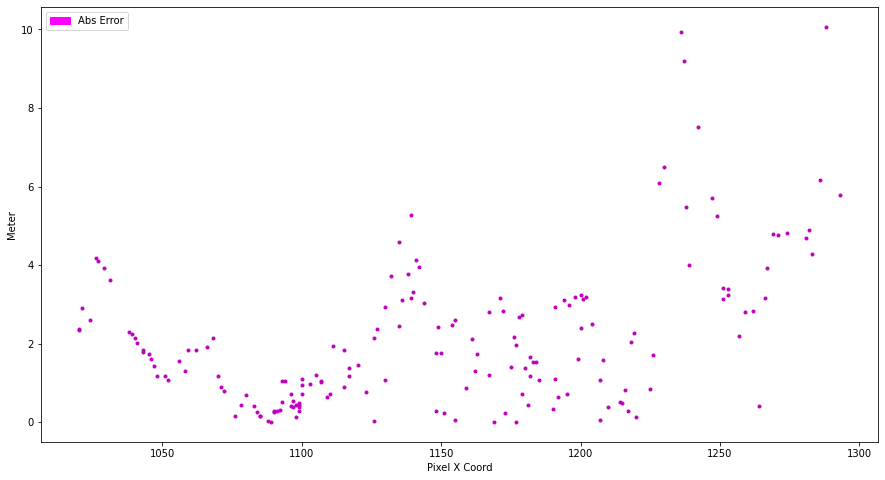

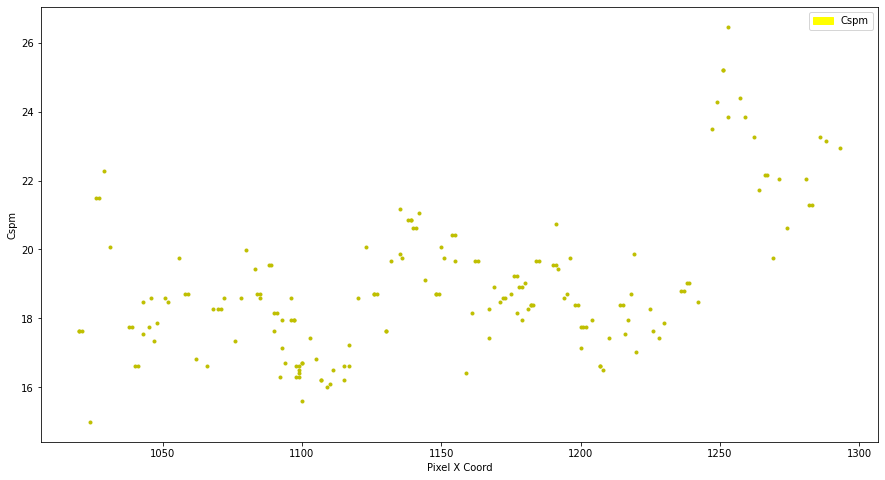

In [41]:
for i, coords in enumerate(transect_coords):
    generate_transect_charts(df_data, coords, charts_path, None)